* Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)
* Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety
* Разделите данные на выборку для обучения и тестирования
* Постройте модель LDA
* Визуализируйте предсказания для тестовой выборки и центры классов
* Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width
* Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию

In [21]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
iris = load_iris()
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)

In [4]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [3]:
iris_df = df_iris[['sepal length (cm)', 'sepal width (cm)']]
iris_df.head()

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [4]:
iris_class = iris.target

In [12]:
# попробуем тестовую выборку 25
X_train, X_test, y_train, y_test = train_test_split(iris_df, iris_class, test_size=0.25)
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [13]:
result = pd.DataFrame([y_test, lda.predict(X_test)]).T
result

,0,1
0,0,0
1,2,1
2,0,0
3,1,1
4,0,0
5,2,2
6,1,1
7,1,1
8,2,2
9,1,1


In [14]:
lda.predict(X_test)

array([0, 1, 0, 1, 0, 2, 1, 1, 2, 1, 0, 1, 1, 1, 0, 2, 0, 2, 2, 2, 0, 0,
       1, 1, 2, 1, 0, 1, 0, 2, 1, 2, 1, 1, 1, 0, 1, 2])

In [15]:
accuracy_score(y_test, lda.predict(X_test))
# относительно неплохая точность

0.8947368421052632

In [12]:
lda.coef_

array([[-6.78823551,  7.98445556],
       [ 2.18399338, -4.37127661],
       [ 5.11429844, -4.49041268]])

In [16]:
lda.means_

array([[5.0125    , 3.45      ],
       [5.93333333, 2.76363636],
       [6.50512821, 2.95384615]])

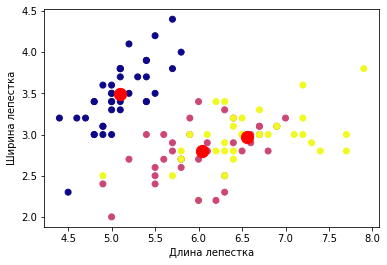

In [25]:
plt.scatter(X_train['sepal length (cm)'], X_train['sepal width (cm)'], c=y_train, cmap='plasma')
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='red', s=150, marker='o')
plt.xlabel('Длина лепестка', fontsize=10)
plt.ylabel('Ширина лепестка', fontsize=10)

plt.show()
# Одна из групп отделилась(похоже это какой-то необычный вид ириса, лепестки которого значимо отличаются от других видов)
# два других вида четко разделить не получилось

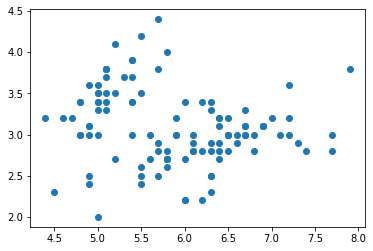

In [26]:
# оставим два признака - sepal_length и sepal_width
plt.scatter(X_train['sepal length (cm)'], X_train['sepal width (cm)'])

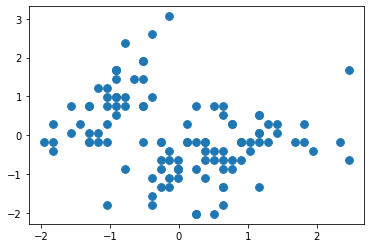

In [48]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1],cmap='plasma', s=60)

In [57]:
k_inertia = []

ks = range(1, 11)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X_scaled)
    k_inertia.append(clf_kmeans.inertia_)

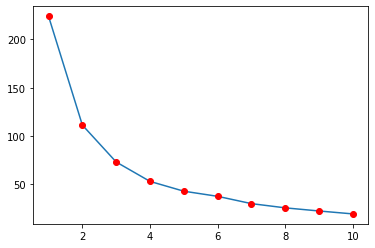

In [58]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')
#стоит попробовать три кластера

In [51]:
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(X_scaled)
clusters

array([1, 0, 0, 2, 2, 0, 0, 1, 0, 0, 1, 1, 1, 2, 1, 1, 0, 0, 0, 2, 1, 0,
       1, 2, 1, 2, 2, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 2, 1, 0, 0, 2, 2, 0,
       2, 0, 1, 1, 1, 0, 0, 2, 0, 2, 1, 0, 1, 0, 2, 0, 2, 0, 1, 0, 2, 0,
       2, 0, 1, 2, 2, 1, 0, 1, 1, 0, 1, 1, 2, 0, 2, 1, 1, 2, 2, 1, 0, 1,
       2, 0, 1, 0, 1, 0, 1, 1, 1, 1, 2, 0, 1, 2, 2, 0, 0, 1, 0, 0, 2, 0,
       0, 1])

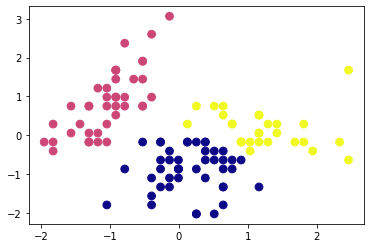

In [52]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], cmap='plasma', c=clusters, s=60)